# Clase en linea
#### Viernes 27 de marzo de 2020

Si se hace una retrospectiva de las útlimas semanas, hemos estado haciendo una construcción para llegar a algo. Primero, aprendimos lo que era estadística, y como podiamos realizar una inferencia, ya que en astrofísica la mayoria de los problemas consisten en una serie de datos de los cuales yo quiero inferir algo, como por ejemplo, $\textit{inferir una serie de parámetros que estan envueltos en el paradigma del LCDM}$. Con esto, yo puedo formular una hipótesis, como por ejemplo $\textit{¿es el CMB consistente con un espectro de potencial inicial sin escala y una distribución gaussiana?}$. Todo esto con la finalidad de seleccionar un modelo.

Ya hemos hecho estimación de parámetros, el método de chi square para una recta fue lo que hicimos hace dos semanas, aunque se dificulta y aveces resulta imposible cuando aumenta el número de parámetros aumenta. Hay muchas cosas a considerar cuando realizamos un ajuste en los datos, ¿qué pasa si nuestros datos no siguen una línea recta?, ¿qué pasa si nosotros tenemos mas de dos parámetros libres?, o mas importante, ¿qué pasa si no creemos mucho en las barras de error?. Todo esto nos lleva a ese algo del que se habló al principio, no siempre el conjunto de parámetros que mejor se ajustan a mi modelo es el mas probable de que asi sea, ya que dichos parámetros podrían ser imposibles, es en este momento en el que comenzamos a hablar de probabilidad. Es posible que los datos con mejor ajuste sean los mas probables, pero no siempre es esto cierto y la cosa cada vez se pone mas interesante xd.

## Likelihood

El likelihood o la función likelihood mide la probabilidad de que un modelo se ajuste de la mejor forma a una serie de datos. Tal y como existen distintas distribuciones de probabilidad, existen diferentes tipos de likelihood, el caso mas común y también el caso al que se reducen la mayoria de casos es el gaussiano. 

$\begin{equation}
L \propto \prod_i^n \frac{1}{2\pi \sigma_i^2}exp(-\frac{(x_i-\mu)^2}{2\sigma_i^2})
\end{equation}$

Una minimización de la funcion chi square, corresponde a una maximización del likelihood, ya que queremos la mayor probabilidad.

Resulta útil eliminar ese feo exponencial y expresar la función de la siguiente forma:

$\begin{equation}
-ln(L(\vec{x},\vec{y}\mid \vec{\theta})) \propto \frac{1}{2}\sum_i (\frac{(y_i - \lambda(x_i,\vec{\theta}))^2}{\sigma_i^2})
\end{equation}$

en donde $\lambda()$ es nuestro modelo para $x_i$

Pero, ¿como máximizamos el likelihood si tenemos muchos parámetros? ¿cómo lo hacemos si tenemos un modelo muy complejo? ¿qúe pasa si el likelihood no es gaussiano?

## MonteCarlo Markov Chain

Este método consiste en generar muestras aleatorias para los parámetros y aceptarlas o rechazarlas de acuerdo al likelihood.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Primero, definimos nuestra función likelihood y nuestra funcion MonteCarlo

In [19]:
def likelihood(x, y, sigma, modelo, parametro):
    return (-1/2)*np.sum(((y-modelo(x, parametro))**2)/sigma**2)

In [113]:
#Nuestro modelo es una recta
def modelo(x, parametro):
    return x*parametro[0]+parametro[1]

x = np.linspace(0,10,1000)
p_reales = [10, 15]
des = np.zeros(len(x))
for i in range(len(x)):
    des[i] = 0.1

y = x*p_reales[0] + p_reales[1]

In [142]:
p_i = [4,10]

In [143]:
likelihood(x, y, des, modelo, p_i)

-76280030.03003001

In [175]:
def montecarlo_chain(x, y, sigma, modelo, p_i, n):

    L_v = likelihood(x, y, sigma, modelo, p_i)
    markov_chain = []
    markov_chain.append([p_i, L_v])
    
    for i in range(n):
        p_n = []
        p_n = [np.random.uniform(p_i[0]-sigma[0], p_i[0]+sigma[0]), np.random.uniform(p_i[1]-sigma[0], p_i[1]+sigma[0]) ]
        
        L_n = likelihood(x, y, sigma, modelo, p_n)
        
        if (L_n>L_v):
            markov_chain.append([p_n, L_n])
            p_i = p_n 
            L_v = L_n
            continue
        elif  (L_n/L_v > np.random.randn()):
            markov_chain.append([p_n, L_n])
        
    else:     
        return markov_chain
        
    return markov_chain

In [176]:
a = montecarlo_chain(x,y,des,modelo, p_i, 1000)

In [177]:
lik = np.zeros(len(a))
for i in range(len(a)):
    lik[i] = a[i][1]

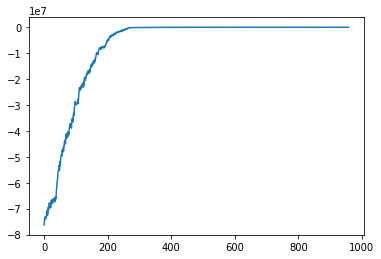

In [178]:
plt.plot(lik)